# PROYECTO FP

Autor: Cristina Victoria Beltrán Soto

El objetivo de este Notebook es trabajar con los datos del archivo csv que contiene los datos de videpjuegosde empresas como Nintendo, Microsoft Game Studios y muchas más.

In [1]:
import csv
from platform import platform
from matplotlib import pyplot as plt
from tokenize import Name
from collections import namedtuple

## Función de lectura de texto

Los datos se encuentran en un fichero en formato CSV codificado en UTF-8. En este Notebook se va a trabajar con los datos:

In [2]:
Juego = namedtuple('Juego', 'Name, Platform, Year_of_Release, Publisher, Global_Sales, Critic_Score, Critic_Count')
def lee_videojuegos(fichero):
    with open(fichero, encoding='utf-8') as f:
        lector = csv.reader(f, delimiter=';')
        next(lector)
        videojuego = []
        for Name, Platform, Year_of_Release, Publisher, Global_Sales, Critic_Score, Critic_Count in lector:
            videojuego.append(Juego(Name, Platform, int(Year_of_Release), Publisher,  float(Global_Sales), int(Critic_Score), int(Critic_Count)))
    return videojuego

In [3]:
videojuegos = lee_videojuegos('videojuegos.csv')
print(videojuegos[:5])

[Juego(Name='Wii Sports', Platform='Wii', Year_of_Release=2006, Publisher='Nintendo', Global_Sales=82.53, Critic_Score=76, Critic_Count=51), Juego(Name='Mario Kart Wii', Platform='Wii', Year_of_Release=2008, Publisher='Nintendo', Global_Sales=35.52, Critic_Score=82, Critic_Count=73), Juego(Name='Wii Sports Resort', Platform='Wii', Year_of_Release=2009, Publisher='Nintendo', Global_Sales=32.77, Critic_Score=80, Critic_Count=73), Juego(Name='New Super Mario Bros.', Platform='DS', Year_of_Release=2006, Publisher='Nintendo', Global_Sales=29.8, Critic_Score=89, Critic_Count=65), Juego(Name='Wii Play', Platform='Wii', Year_of_Release=2006, Publisher='Nintendo', Global_Sales=28.92, Critic_Score=58, Critic_Count=41)]


## Filtrado y conteo

Vamos a comenzar por hacer un filtrado en función de la empresa de videojuegos. Luego compararemos el número de videojuegos que ha publicado cada empresa.

In [4]:
def publicado(videojuegos):
    publisher = [e.Publisher for e in videojuegos]
    return publisher

In [5]:
empresa = publicado(videojuegos)
print(set(empresa))

{'Sony Computer Entertainment Europe', 'Sony Computer Entertainment', 'Konami Digital Entertainment', 'Microsoft Game Studios', 'LucasArts', 'Capcom', 'MTV Games', '505 Games', 'Activision', 'Bethesda Softworks', 'Square Enix', 'GT Interactive', 'Eidos Interactive', 'Ubisoft', 'Virgin Interactive', 'Namco Bandai Games', 'Electronic Arts', 'Atari', 'Warner Bros. Interactive Entertainment', 'Take-Two Interactive', 'RedOctane', 'Universal Interactive', 'Nintendo', 'Sega', 'SquareSoft', 'Vivendi Games'}


In [6]:
def juegos_por_empresa(lista):
    Dic=dict()
    for _,_,_,publisher,_,_,_ in lista:
        
        if publisher in Dic.keys():
            Dic[publisher]= Dic[publisher]+1
        else:
#            publisher = [Publisher for _,_,_,Publisher,_,_,_ in videojuegos]
            Dic[publisher]= 1
    return Dic

In [7]:
print(juegos_por_empresa(videojuegos))

{'Nintendo': 61, 'Microsoft Game Studios': 19, 'Take-Two Interactive': 23, 'Sony Computer Entertainment': 36, 'Activision': 40, 'Ubisoft': 24, 'Bethesda Softworks': 9, 'Electronic Arts': 51, 'SquareSoft': 2, 'GT Interactive': 1, 'Konami Digital Entertainment': 8, 'Square Enix': 5, 'Sony Computer Entertainment Europe': 2, 'Virgin Interactive': 2, 'LucasArts': 5, '505 Games': 2, 'Capcom': 6, 'Warner Bros. Interactive Entertainment': 5, 'Universal Interactive': 1, 'Eidos Interactive': 4, 'RedOctane': 1, 'Atari': 3, 'Namco Bandai Games': 6, 'Vivendi Games': 1, 'MTV Games': 1, 'Sega': 1}


## Nota Media

Calcularemos la nota media de todas las empresas representadas anteriormente entre todos sus videojuegos, sobre 100.

In [8]:
def calcula_nota(videojuegos):
    diccionario=dict()
    publishers = {Publisher for _,_,_,Publisher,_,_,_ in videojuegos}
    for publisher in publishers:
            nota= [Critic_Score for _,_,_,Publisher,_,Critic_Score,_ in videojuegos if Publisher==publisher]
            diccionario[publisher]=sum(nota)/len(nota)
    return diccionario

In [9]:
print(calcula_nota(videojuegos))

{'Sony Computer Entertainment Europe': 92.0, 'Sony Computer Entertainment': 87.86111111111111, 'Konami Digital Entertainment': 90.875, 'Microsoft Game Studios': 86.94736842105263, 'LucasArts': 77.2, 'Capcom': 85.33333333333333, 'MTV Games': 82.0, '505 Games': 68.5, 'Activision': 84.85, 'Bethesda Softworks': 89.55555555555556, 'Square Enix': 86.8, 'GT Interactive': 87.0, 'Eidos Interactive': 89.75, 'Ubisoft': 79.5, 'Virgin Interactive': 90.0, 'Namco Bandai Games': 80.66666666666667, 'Electronic Arts': 83.37254901960785, 'Atari': 63.666666666666664, 'Warner Bros. Interactive Entertainment': 85.0, 'Take-Two Interactive': 88.52173913043478, 'RedOctane': 92.0, 'Universal Interactive': 66.0, 'Nintendo': 82.26229508196721, 'Sega': 82.0, 'SquareSoft': 92.0, 'Vivendi Games': 96.0}


## Top 5 mejores y peores


Localizaremos los 5 mejores videojuegos de todas las plataformas, nos centrandonos en la nota, menos en el último el cual nos centraremos en las ventas globales, la cual está sobre 100. Luego haremos lo mismo, pero para los 5 peores videojuegos, para comparar los resultados.

In [10]:
def mostrar_numerado(videojuegos):
    i=0
    for p in videojuegos:
        i=i+1
        print (i, p) 

In [11]:
def mejor_videojuego(lista, platform=None):
    mejorvideojuego = []
    if platform is not None:
        lista = [e for e in lista if e.Platform==platform]
    for elemento in lista:
        if mejorvideojuego == []: 
            mejorvideojuego.append(elemento)
        else:
            if elemento.Critic_Score > mejorvideojuego[0].Critic_Score:
                mejorvideojuego.clear() 
                mejorvideojuego.append(elemento)
            elif elemento.Critic_Score == mejorvideojuego[0].Critic_Score:
                mejorvideojuego.append(elemento)
            else:
                continue 
    return mejorvideojuego

In [12]:
print(mejor_videojuego(videojuegos))

[Juego(Name='Grand Theft Auto IV', Platform='X360', Year_of_Release=2008, Publisher='Take-Two Interactive', Global_Sales=11.01, Critic_Score=98, Critic_Count=86), Juego(Name='Grand Theft Auto IV', Platform='PS3', Year_of_Release=2008, Publisher='Take-Two Interactive', Global_Sales=10.5, Critic_Score=98, Critic_Count=64), Juego(Name="Tony Hawk's Pro Skater 2", Platform='PS', Year_of_Release=2000, Publisher='Activision', Global_Sales=4.68, Critic_Score=98, Critic_Count=19)]


In [13]:
def top5mejores(datos, condicion=None, criterio=lambda x:x.Critic_Score, limite=5):
    if criterio is not None:
        datos=[juego for juego in datos if condicion(juego)]
    return sorted(datos, key=criterio,reverse=True)[:limite]

In [14]:
test= top5mejores(videojuegos, lambda y:y.Platform=='Wii')
print("Top 5 mejores videojuegos de Wii:")
mostrar_numerado(test)

Top 5 mejores videojuegos de Wii:
1 Juego(Name='Super Mario Galaxy', Platform='Wii', Year_of_Release=2007, Publisher='Nintendo', Global_Sales=11.35, Critic_Score=97, Critic_Count=73)
2 Juego(Name='Super Mario Galaxy 2', Platform='Wii', Year_of_Release=2010, Publisher='Nintendo', Global_Sales=7.51, Critic_Score=97, Critic_Count=87)
3 Juego(Name='The Legend of Zelda: Twilight Princess', Platform='Wii', Year_of_Release=2006, Publisher='Nintendo', Global_Sales=7.15, Critic_Score=95, Critic_Count=73)
4 Juego(Name='Super Smash Bros. Brawl', Platform='Wii', Year_of_Release=2008, Publisher='Nintendo', Global_Sales=12.84, Critic_Score=93, Critic_Count=81)
5 Juego(Name='The Legend of Zelda: Skyward Sword', Platform='Wii', Year_of_Release=2011, Publisher='Nintendo', Global_Sales=3.95, Critic_Score=93, Critic_Count=81)


In [15]:
def peor_videojuego(lista, platform=None):
    peorvideojuego = []
    if platform is not None:
        lista = [e for e in lista if e.Platform==platform]
    for elemento in lista:
        if peorvideojuego == []: 
            peorvideojuego.append(elemento)
        else:
            if elemento.Critic_Score < peorvideojuego[0].Critic_Score:
                peorvideojuego.clear() 
                peorvideojuego.append(elemento)
            elif elemento.Critic_Score == peorvideojuego[0].Critic_Score:
                peorvideojuego.append(elemento)
            else:
                continue 
    return peorvideojuego

In [16]:
print(peor_videojuego(videojuegos))

[Juego(Name='Just Dance', Platform='Wii', Year_of_Release=2009, Publisher='Ubisoft', Global_Sales=7.2, Critic_Score=49, Critic_Count=21)]


In [17]:
def top_peores(datos, condicion=None, criterio=lambda x:x.Critic_Score, limite=5):
    if condicion is not None:
        datos=[juego for juego in datos if condicion(juego)]
    return sorted(datos, key=criterio)[:limite]

In [18]:
top5peores = top_peores(videojuegos, criterio=lambda x:x.Global_Sales)
print("Top 5 peores videojuegos(ventas):")
mostrar_numerado(top5peores)

Top 5 peores videojuegos(ventas):
1 Juego(Name='Heavy Rain', Platform='PS3', Year_of_Release=2010, Publisher='Sony Computer Entertainment', Global_Sales=3.03, Critic_Score=87, Critic_Count=107)
2 Juego(Name='Kung Fu Panda', Platform='X360', Year_of_Release=2008, Publisher='Activision', Global_Sales=3.04, Critic_Score=75, Critic_Count=42)
3 Juego(Name='Mass Effect 3', Platform='X360', Year_of_Release=2012, Publisher='Electronic Arts', Global_Sales=3.04, Critic_Score=93, Critic_Count=74)
4 Juego(Name='Animal Crossing: Happy Home Designer', Platform='3DS', Year_of_Release=2015, Publisher='Nintendo', Global_Sales=3.05, Critic_Score=66, Critic_Count=60)
5 Juego(Name='The Sims 4', Platform='PC', Year_of_Release=2014, Publisher='Electronic Arts', Global_Sales=3.05, Critic_Score=70, Critic_Count=74)


## Gráfica

Haremos una gráfica la cual represente las ventes globalmente en la empresa Wii

In [19]:
def ventas(registros,Platform):
    wii = [e.Global_Sales for e in registros if e.Platform == Platform]
    plt.plot(wii, label='ventas en '+ Platform)
    plt.legend()
    plt.show()

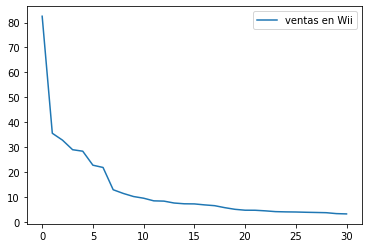

In [20]:
ventas(videojuegos,'Wii')

In [21]:
# Número de juegos de Wii
len([e for e in videojuegos if e.Platform=='Wii'])

31